# End to End Project - Estimate wine quality

## Problem Statement / Objective
Estimate the quality of red wine, represented as score between 0 (very bad) and 10 (very excellent), based on the given set of attributes

## Dataset
This dataset is taken from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality

## Methodology used
Supervised Regression analysis

In [1]:
# Importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get the data

In [2]:
# Importing the dataset

wine = pd.read_csv('/cxldata/datasets/project/wine_quality_red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Plotting histograms

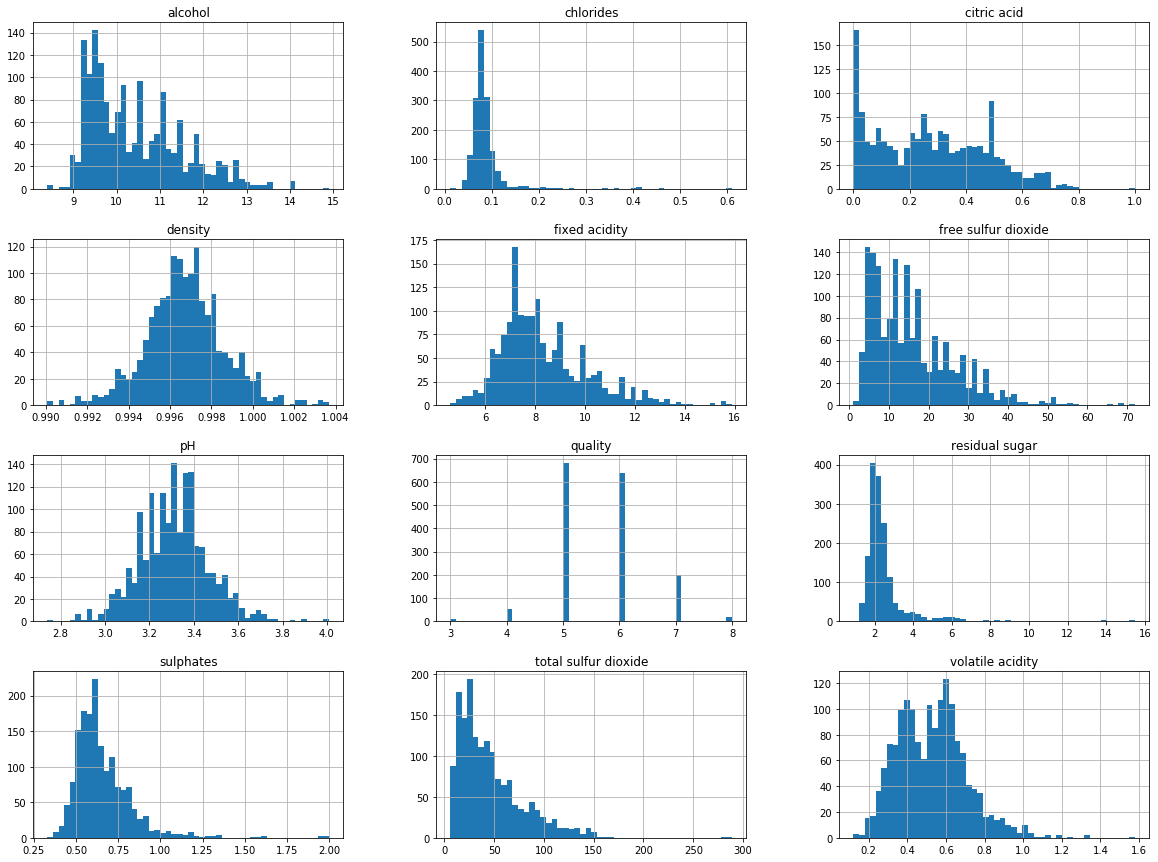

In [6]:
wine.hist(bins=50, figsize=(20,15))
plt.show()

<b><u>Observations on attributes:</u></b> <br>

1. Alcohol - It is slightly skewed to the right. The average values lie between 9 and 12. Modality is multimodal
2. Chlorides - It is tail-heavy and right skewed. The maximum observations are around 0.05 to 0.10. Data capping should be done
3. Citric acid - Almost 10% of total observations have value as 0. Unusual number of instances (~90) at 0.5 value. Modality is multimodal
4. Density - Symmetric slope = Normal distribution
5. Fixed acidity - Mean is 8.32 but, almost 10% of total observations are at value ~7. Modality is multimodal
6. Free sulphur dioxide - Modality is multimodal. Distribution is right skewed with a bit long tail. Data capping should be done
7. pH - Normal ditribution; Modality is multimodal
8. Quality - It is the TARGET ATTRIBUTE
9. Residual sugar - Data is right skewed with heavy tail. Data capping should be done
10. Sulphates - Data is slightly right skewed with heavy tail. Data capping should be done
11. Total sulphur dioxide - Distribution is right skewed with heavy tail. Data capping should be done
12. Volatile acidity - Modality is multimodal and it is normal distribution

In [7]:
# Calculating category for highly correlated column - Back working

wine['alcohol_cat'] = np.ceil(wine['alcohol']/1.5)
wine_alcohol_cat = wine.pop('alcohol_cat')
alcohol_total_prop = wine_alcohol_cat.value_counts() / 1599

## Splitting train and test set

In [8]:
# Random sampling - 75:25

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(wine, test_size=0.25, random_state=21)

print('Train set: ', len(train_set), '\nTest set: ', len(test_set), '\nTotal: ', len(wine))

Train set:  1199 
Test set:  400 
Total:  1599


# Explore data to gain insights

In [9]:
# Creating copy of the training set

wine = train_set.copy()

## Observing correlation

In [10]:
# Identifying correlation - Matrix

wine_corr = wine.corr()
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.286352,0.668225,0.092139,0.080452,-0.154098,-0.116100,0.641613,-0.682855,0.178140,-0.034342,0.133854
volatile acidity,-0.286352,1.000000,-0.565374,0.008651,0.075909,-0.043497,0.044787,0.016120,0.256395,-0.265059,-0.202955,-0.393233
citric acid,0.668225,-0.565374,1.000000,0.166936,0.196430,-0.048346,0.051629,0.355539,-0.544482,0.297193,0.125731,0.232374
residual sugar,0.092139,0.008651,0.166936,1.000000,0.047004,0.204179,0.225117,0.331865,-0.064486,0.001962,0.077495,0.035042
chlorides,0.080452,0.075909,0.196430,0.047004,1.000000,-0.001216,0.042129,0.198137,-0.251660,0.361416,-0.218088,-0.124747
free sulfur dioxide,-0.154098,-0.043497,-0.048346,0.204179,-0.001216,1.000000,0.667120,-0.039529,0.078831,0.064725,-0.035486,-0.032591
total sulfur dioxide,-0.116100,0.044787,0.051629,0.225117,0.042129,0.667120,1.000000,0.054343,-0.078248,0.059169,-0.182020,-0.166588
density,0.641613,0.016120,0.355539,0.331865,0.198137,-0.039529,0.054343,1.000000,-0.309683,0.159356,-0.484342,-0.165663
pH,-0.682855,0.256395,-0.544482,-0.064486,-0.251660,0.078831,-0.078248,-0.309683,1.000000,-0.204182,0.173914,-0.058661
sulphates,0.178140,-0.265059,0.297193,0.001962,0.361416,0.064725,0.059169,0.159356,-0.204182,1.000000,0.078419,0.239005


In [11]:
wine_corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.468382
sulphates               0.239005
citric acid             0.232374
fixed acidity           0.133854
residual sugar          0.035042
free sulfur dioxide    -0.032591
pH                     -0.058661
chlorides              -0.124747
density                -0.165663
total sulfur dioxide   -0.166588
volatile acidity       -0.393233
Name: quality, dtype: float64

<b><u>Observations on Correlation:</u></b>

1. Alcohol has highest positive correlation with target attribute
2. Volatile acidity has highest negative correlation with target attribute

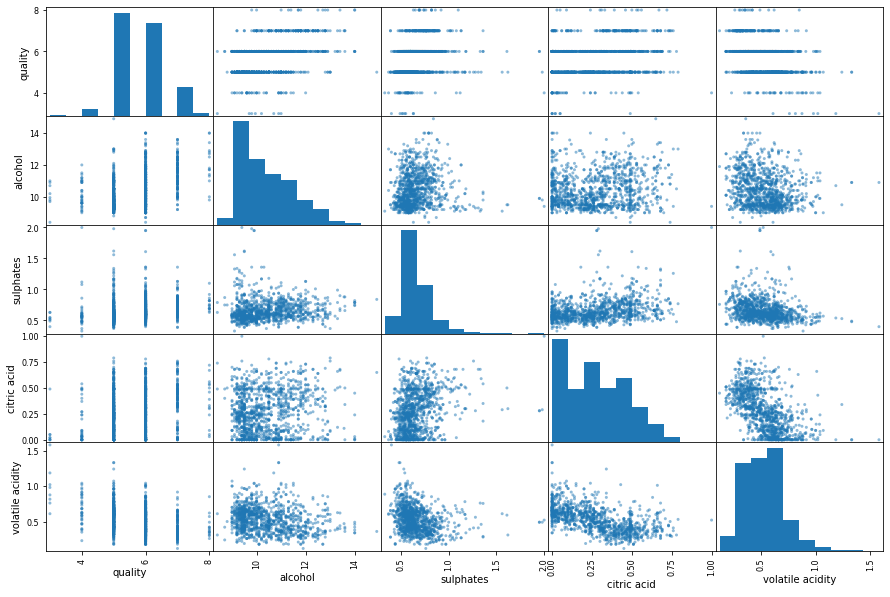

In [12]:
# Identifying correlation - Charts

from pandas.plotting import scatter_matrix

scatter_matrix(wine[['quality', 'alcohol', 'sulphates', 'citric acid', 'volatile acidity']], figsize=(15,10))
plt.show()

In [13]:
# Checking proportion of each category of ALCOHOL in total set as well in training set

# Creating a discrete attribute

wine['alcohol_cat'] = np.ceil(wine['alcohol']/1.5)

# Checking training set proportion

alcohol_train_prop = wine['alcohol_cat'].value_counts() / len(wine) 

# Preparing a Data Frame

compare_prop = pd.DataFrame({'Overall': alcohol_total_prop,
                            'Random': alcohol_train_prop}).sort_index()

# Adding a column to the Data Frame

compare_prop['Random %'] = ((compare_prop['Random'] / compare_prop['Overall'])-1)*100

# Removing additional column from the training set

wine.drop('alcohol_cat', axis=1, inplace=True) 

compare_prop

,Overall,Random,Random %
6.0,0.023139,0.021685,-6.286771
7.0,0.591620,0.604671,2.205943
8.0,0.297061,0.294412,-0.891620
9.0,0.080050,0.070058,-12.481756
10.0,0.008130,0.009174,12.844037


**Note:** As the proportion of each category of ALCOHOL attribute in random sample is significantly representative of their proportion in total dataset, random sampling is considered for the estimation exercise.

## Feature combination(s)

In [14]:
# Expermenting with feature combination - Free sulfur dioxide to Total sulfur dioxide

wine['free sulfur proportion'] = wine['free sulfur dioxide'] / wine['total sulfur dioxide']

# Checking correlation again

corr_matrix = wine.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                   1.000000
alcohol                   0.468382
sulphates                 0.239005
citric acid               0.232374
free sulfur proportion    0.200344
fixed acidity             0.133854
residual sugar            0.035042
free sulfur dioxide      -0.032591
pH                       -0.058661
chlorides                -0.124747
density                  -0.165663
total sulfur dioxide     -0.166588
volatile acidity         -0.393233
Name: quality, dtype: float64

**Note:** It is interesting to note that, the correlation of newly added 'free sulfur proportion' is quite positive; even though each of its inherent features, viz. 'free sulfur dioxide' and 'total sulfur dioxide' has negative correlation

# Prepare the data for ML algorithms

In [15]:
# Create dataset for learning by removing the target attribute and creating its copy as labels

wine = train_set.drop('quality', axis=1)
wine_labels = train_set['quality'].copy()

In [16]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 1195 to 969
Data columns (total 11 columns):
fixed acidity           1199 non-null float64
volatile acidity        1199 non-null float64
citric acid             1199 non-null float64
residual sugar          1199 non-null float64
chlorides               1199 non-null float64
free sulfur dioxide     1199 non-null float64
total sulfur dioxide    1199 non-null float64
density                 1199 non-null float64
pH                      1199 non-null float64
sulphates               1199 non-null float64
alcohol                 1199 non-null float64
dtypes: float64(11)
memory usage: 112.4 KB


## Building Custom Transformers

### Transformer - 1

In [17]:
# Building a class to add one new attribute representing a ratio of two existing attributes in a DataFrame.
# Since, it will be used inside Scikit-learn's Pipeline, the same is to be converted into NumPy array.
# Hence, numerical indexing (Row index, Column index) is followed (instead of Column Labels).

from sklearn.base import BaseEstimator, TransformerMixin

class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        free_sulfur_proportion = X[:,5] / X[:,6] # Input is NumPy array
        return np.c_[X, free_sulfur_proportion] # Output is also NumPy array

In [18]:
# Testing the custom transformer created above --> Working properly

wine_extra_attributes = AttributesAdder().transform(wine.values)
# wine_extra_attributes = pd.DataFrame(wine_extra_attributes, columns=list(wine.columns) + ['free sulfur proportion'])
# wine_extra_attributes.head()

### Transformer - 2

In [19]:
# Creating a DataFrame selector function; as Scikit-learn does not handle DataFrames yet

# Below code transforms the Pandas DataFrame to a NumPy array

from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

## Feature Scaling

In [20]:
# Testing Standard Scaler feature

from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit(wine_extra_attributes)
x = x.transform(wine_extra_attributes)

x = pd.DataFrame(x, columns=list(wine.columns) + ['free sulfur proportion'])
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,free sulfur proportion
0,-1.224052,-0.544010,-0.273094,-0.546220,-0.204928,0.479138,0.270708,-0.223744,1.359412,-0.340738,-0.858736,-0.039493
1,-0.935249,-0.600175,-0.020713,4.565038,-0.416073,0.761209,2.994405,-1.064367,-0.964363,-0.512252,0.845549,-1.404449
2,-0.011080,0.410789,-0.121665,-0.245558,0.639650,-0.649149,-0.262189,-0.317146,-1.028913,-0.740937,-0.574689,-0.925517
3,2.357104,-0.993327,1.089768,0.055105,-0.183814,1.043281,0.655578,1.462997,-1.222561,0.516829,-0.006594,0.065069
4,-1.108531,-0.319351,0.635480,-0.095226,-0.352730,-0.743173,-0.824692,-0.240226,1.617609,0.402487,0.182771,0.255848
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1.144131,-1.049492,1.241197,0.205436,1.505343,-0.085006,0.833210,1.682768,-0.835265,-0.112054,-0.953419,-1.161790
1195,-1.108531,-0.712504,-0.222618,-0.696551,-0.458302,-1.025245,-1.031930,-0.514940,0.197524,-0.569423,-1.142784,0.227720
1196,0.682047,0.242295,-0.020713,-0.170392,-0.120470,0.667185,2.875983,0.594902,-0.254321,-0.626594,-0.953419,-1.420097
1197,-0.299883,1.618328,-1.333098,0.055105,-0.289386,3.017782,1.277291,-0.289675,0.455721,-0.226396,0.372136,0.975918


## Building a Pipeline

In [21]:
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ('selector', DataFrameSelector(list(wine))),
    ('attribs_adder', AttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [22]:
# Preparing the Training set by transforming it using a Pipeline

wine_prepared = full_pipeline.fit_transform(wine)
# wine_prepared = pd.DataFrame(wine_prepared, columns=list(wine.columns) + ['free sulfur proportion'])
# wine_prepared.head()

# Explore & train multiple ML models and select the best ones

## Model - 1: Linear Regression

In [23]:
# Training the model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_prepared, wine_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Making predictions on training set

wine_predictions = lin_reg.predict(wine_prepared)

In [25]:
# Evaluating performance using RMSE

from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(wine_labels, wine_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.65039018471482

In [26]:
lin_rmse / 3 * 100 # Proportion of error to the normal range of quality ---> 3 to 8

21.679672823827335

In [27]:
# Evaluating performance using Cross Validation

from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, wine_prepared, wine_labels, scoring='neg_mean_squared_error', cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

print('Scores:', lin_rmse_scores)
print('Mean Score', lin_rmse_scores.mean())
print('Standard Deviation of Scores', lin_rmse_scores.std())

Scores: [0.6554289  0.64610213 0.69746554 0.65921635 0.66260185 0.65199393
 0.64384265 0.68513514 0.64063603 0.67043352]
Mean Score 0.6612856025430214
Standard Deviation of Scores 0.017462309876527717


## Model - 2: Decision Tree

In [28]:
# Training the model

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=21)
tree_reg.fit(wine_prepared, wine_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=21, splitter='best')

In [29]:
# Making predictions on training set

wine_predictions = tree_reg.predict(wine_prepared)

In [30]:
# Evaluating performance using RMSE

from sklearn.metrics import mean_squared_error

tree_mse = mean_squared_error(wine_labels, wine_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [31]:
# Evaluating performance using Cross Validation

from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, wine_prepared, wine_labels, scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-tree_scores) 

print('Scores:', tree_rmse_scores)
print('Mean Score', tree_rmse_scores.mean())
print('Standard Deviation of Scores', tree_rmse_scores.std())

Scores: [0.79056942 0.6770032  0.81649658 0.90369611 0.79056942 0.80104099
 0.89442719 0.80104099 0.90829511 0.74472938]
Mean Score 0.8127868381035119
Standard Deviation of Scores 0.06956824476472645


## Model - 3: Random Forests

In [32]:
# Training the model

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=21)
forest_reg.fit(wine_prepared, wine_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=21, verbose=0, warm_start=False)

In [33]:
# Making predictions on training set

wine_predictions = forest_reg.predict(wine_prepared)

In [34]:
# Evaluating performance using RMSE

from sklearn.metrics import mean_squared_error

forest_mse = mean_squared_error(wine_labels, wine_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.21737707789690205

In [35]:
# Evaluating performance using Cross Validation

from sklearn.model_selection import cross_val_score

forest_reg_scores = cross_val_score(forest_reg, wine_prepared, wine_labels, scoring='neg_mean_squared_error', cv=10)

forest_rmse_scores = np.sqrt(-forest_reg_scores)

print('Scores:', forest_rmse_scores)
print('Mean Score', forest_rmse_scores.mean())
print('Standard Deviation of Scores', forest_rmse_scores.std())

Scores: [0.60008194 0.53819916 0.61187349 0.63799948 0.54604792 0.59947268
 0.64636161 0.61824415 0.61955764 0.58277228]
Mean Score 0.6000610352804484
Standard Deviation of Scores 0.03387757684171232


## Model - 4: XGBoost

In [36]:
# Training the model

from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(wine_prepared, wine_labels)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [37]:
# Making predictions on training set

wine_predictions = xgb_reg.predict(wine_prepared)

In [38]:
# Evaluating performance using RMSE

from sklearn.metrics import mean_squared_error

xgb_mse = mean_squared_error(wine_labels, wine_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

0.4962282021785791

In [39]:
# Evaluating performance using Cross Validation

from sklearn.model_selection import cross_val_score

xgb_reg_scores = cross_val_score(xgb_reg, wine_prepared, wine_labels, scoring='neg_mean_squared_error', cv=10)

xgb_rmse_scores = np.sqrt(-xgb_reg_scores)

print('Scores:', xgb_rmse_scores)
print('Mean Score', xgb_rmse_scores.mean())
print('Standard Deviation of Scores', xgb_rmse_scores.std())

Scores: [0.64604197 0.59701343 0.65681505 0.63727799 0.60505488 0.59695342
 0.67787898 0.65362375 0.62552095 0.63223525]
Mean Score 0.6328415670507365
Standard Deviation of Scores 0.02574218729489857


## Summary of scores

In [40]:
# Custom function to aggregate scores (Average RMSE and Standard Deviation) of various ML models as Pandas DataFrame

def ScoresMatrix(scores, labels):
    means = []
    stds = []
    for i in scores:
        means.append(i.mean())
        stds.append(i.std())
    return pd.DataFrame([means, stds], columns=labels, index=['Mean (μ)', 'Standard Deviation (σ)'])

In [41]:
# Aggregating values and presenting scores

scores = [lin_rmse_scores, tree_rmse_scores, forest_rmse_scores, xgb_rmse_scores]
labels = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

ScoresMatrix(scores, labels)

,Linear Regression,Decision Tree,Random Forest,XGBoost
Mean (μ),0.661286,0.812787,0.600061,0.632842
Standard Deviation (σ),0.017462,0.069568,0.033878,0.025742


<b><u>Conclusion:</u> </b>Based on the above analysis, it can be concluded that the performance of *Random Forest* is best amongst all other ML models as it has lowest RMSE.

# Fine-tune the selected ML model

## Using Grid Search

In [42]:
from sklearn.model_selection import GridSearchCV

# Creating grid of hyperparameter values of Random Forests

param_grid = [{'n_estimators': [3,5,9,12,21,33], 'max_features': [4,8]}, # 6x2 = 12 combinations
             {'bootstrap': [False], 'n_estimators': [9,19,37,40], 'max_features': [6,8,12]}] # 1x4x3 = 12 combinations.

# Total combinations to try = 12 + 12 = 24 * 5 folds (cv=5 below) = 120 iterations
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=4, return_train_score=True)

grid_search.fit(wine_prepared, wine_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=21,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [43]:
# Checking best hyperparameter combination - Grid Search

grid_search.best_params_

{'max_features': 4, 'n_estimators': 33}

In [44]:
# Checking score (RMSE) for each of the hyperparameter combinations - Grid Search

counter = 1
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(str(counter)+")",np.sqrt(-mean_score), params)
    counter += 1

1) 0.7069158157491813 {'max_features': 4, 'n_estimators': 3}
2) 0.6594699067281659 {'max_features': 4, 'n_estimators': 5}
3) 0.6309680876674076 {'max_features': 4, 'n_estimators': 9}
4) 0.6218188256908708 {'max_features': 4, 'n_estimators': 12}
5) 0.613060700078386 {'max_features': 4, 'n_estimators': 21}
6) 0.6106985092539907 {'max_features': 4, 'n_estimators': 33}
7) 0.7116658691503321 {'max_features': 8, 'n_estimators': 3}
8) 0.6641022505331389 {'max_features': 8, 'n_estimators': 5}
9) 0.6399957397472579 {'max_features': 8, 'n_estimators': 9}
10) 0.6292090758210774 {'max_features': 8, 'n_estimators': 12}
11) 0.6226158459466742 {'max_features': 8, 'n_estimators': 21}
12) 0.614590474927263 {'max_features': 8, 'n_estimators': 33}
13) 0.6556104482345884 {'bootstrap': False, 'max_features': 6, 'n_estimators': 9}
14) 0.6326652293612588 {'bootstrap': False, 'max_features': 6, 'n_estimators': 19}
15) 0.6225675750745773 {'bootstrap': False, 'max_features': 6, 'n_estimators': 37}
16) 0.6216900

In [45]:
# Checking best estimator (all paramaters yeilding best results) - Grid Search

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=33, n_jobs=None, oob_score=False,
                      random_state=21, verbose=0, warm_start=False)

In [46]:
# Checking the weightage of each attribute (column) in the best estimator - Grid Search

grid_imp_features = grid_search.best_estimator_.feature_importances_

wine_attributes = list(wine) + ['free sulfur proportion']

sorted(zip(grid_imp_features, wine_attributes), reverse=True)

[(0.1985193031506172, 'alcohol'),
 (0.12610226410081735, 'sulphates'),
 (0.11718215206300658, 'volatile acidity'),
 (0.08024668503294415, 'total sulfur dioxide'),
 (0.07572056579041546, 'density'),
 (0.06730338311092238, 'citric acid'),
 (0.06647582566127352, 'free sulfur proportion'),
 (0.06433893043358369, 'chlorides'),
 (0.05425595501445407, 'pH'),
 (0.0535702061180796, 'fixed acidity'),
 (0.05245991032991731, 'residual sugar'),
 (0.043824819193968745, 'free sulfur dioxide')]

## Using Randomized Search

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Defining range of values for hyperparameters of Random Forests

param_distribs = {'n_estimators': randint(low=1, high=300),
                 'max_features': randint(low=1, high=10)}

rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=8, scoring='neg_mean_squared_error', random_state=21)

rnd_search.fit(wine_prepared, wine_labels)

RandomizedSearchCV(cv=8, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [48]:
# Checking best hyperparameter combination - Random Search

rnd_search.best_params_

{'max_features': 3, 'n_estimators': 242}

In [49]:
# Checking best estimator (all paramaters yeilding best results) - Random Search

rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=242, n_jobs=None, oob_score=False,
                      random_state=21, verbose=0, warm_start=False)

In [50]:
# Checking score (RMSE) for each of the hyperparameter combinations - Random Search

counter=1
cvres = rnd_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(str(counter)+')', np.sqrt(-mean_score), params)
    counter +=1

1) 0.5995233710935429 {'max_features': 9, 'n_estimators': 261}
2) 0.6054045092110998 {'max_features': 1, 'n_estimators': 121}
3) 0.5952889862731813 {'max_features': 4, 'n_estimators': 189}
4) 0.5943513646170034 {'max_features': 3, 'n_estimators': 242}
5) 0.6014470683702017 {'max_features': 9, 'n_estimators': 111}
6) 0.6027016897731512 {'max_features': 7, 'n_estimators': 123}
7) 0.6046890913952526 {'max_features': 1, 'n_estimators': 239}
8) 0.5993254040872648 {'max_features': 5, 'n_estimators': 85}
9) 0.5974948549367791 {'max_features': 5, 'n_estimators': 205}
10) 0.6013355355198956 {'max_features': 9, 'n_estimators': 170}


In [51]:
# Checking the weightage of each attribute (column) in the best estimator - Random Search

rnd_imp_features = rnd_search.best_estimator_.feature_importances_

sorted(zip(rnd_imp_features, wine_attributes), reverse=True)

[(0.1866557531284456, 'alcohol'),
 (0.13198490617773873, 'volatile acidity'),
 (0.11861773488002711, 'sulphates'),
 (0.07867040646469682, 'density'),
 (0.07595921560763076, 'total sulfur dioxide'),
 (0.06792044620152332, 'citric acid'),
 (0.06666080589873358, 'free sulfur proportion'),
 (0.06335791162600656, 'chlorides'),
 (0.05806024475167894, 'fixed acidity'),
 (0.05598297844268164, 'pH'),
 (0.0503391960195343, 'residual sugar'),
 (0.04579040080130267, 'free sulfur dioxide')]

## Concluding on Fine-tuned ML model

It is evident from the above that, the score (average RMSE) from Randomized Search - *0.59435* is quite good than the score from Grid Search - 0.61069 as well as the score of the initially fitted model -  0.600061.

**Therefore, the Random Forests model, with fined tuned hyperparameters as per the Randomized Search, is used for evaluting the performance on the test dataset.**

## Evaluation of ML model on test dataset

In [52]:
# Selecting the final ML model

final_model = rnd_search.best_estimator_

In [53]:
# Readying the predictors and creating copy of the target attribute as labels

predictor_test_set = test_set.drop('quality', axis=1)
labels_test_set = test_set['quality'].copy()

In [54]:
# Applying pipeline on test dataset

test_set_prepared = full_pipeline.transform(predictor_test_set)

In [55]:
# Making predictions on the test dataset

final_predictions = final_model.predict(test_set_prepared)

In [56]:
# Calculating the final score (RMSE) on the test dataset

final_mse = mean_squared_error(labels_test_set, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.5561189433453955

<div class="alert alert-block alert-info" style="margin-top: 0px">

Project prepared by:

**Dhyey Kotecha**

Email: dhyeygkotecha@gmail.com

(April 24, 2020)